#**Graded Challenge 1**
## **The Prediction of COVID-19 Growing Cases for Vaccination Priority in the US**

Nadia Oktiarsy, FSDS Batch-016 RMT (Buddy: Hana)

---
```
Table of Contents:
1. Objective
2. Problem Statement
3. Data Loading
   - Importing Libraries
   - Extracting Data from BigQuery
   - Loading Data from GitHub
   - Data Types
4. Data Cleaning
   - Subtituting null-value columns with the column needed
   - Data description:
   - Removing irrelevant data based on rows (index)
   - Removing negative or error values
   - Validating after cleaning the data
5. Data Exploration
   - Seperating Data into 3 Queries
   - Grouping and Aggregating Data
      (a) Numbers of reports from each state
      (b.1) Maximum numbers of confirmed cases
      (b.2) Maximum numbers of deaths
      (b.3) Maximum numbers of non-deaths
      (c) Minimum numbers of confirmed cases
      (d) Average variables in each state
    - Data Visualization
6. Conclusion
   References
```

---
### **1. Objective**

A vaccination company in the US is currently planning to produce the newest vaccines type for COVID-19. However, it is revealed that the number of cases in the US is still the highest in the world. The company decided to focus on the US cases, to support citizens to prevent more cases as it infolds as they also plan to use this new type of vaccine in the US first before distributed to other countries.

The provided data of COVID-19 cases are based on the data repository operated by JHU CSSE. As the data track reported is in real-time, with the total of existing data is almost more than 3.6 million on October 9, 2022. The data include: `the location`, and the number `confirmed COVID-19 cases`, `active cases`, `deaths`, and `recoveries` for all affected countries.

Thus, it is significant to `predict the potential of growing cases` based on the population affected by COVID-19 aggregated by location. Moreover, this will be useful to answer `which countries that need the vaccination from the most to the least`.

### **2. Problem Statement**

As the objection mentioned above, there are at least `three factors` before making a decision which countries/regions that must get a focus for vaccincation. Those three factors are:
```
1. Confirmed cases
2. Deaths
3. Non-deaths (including recovered and active cases)
```

The data scientist is assinged to evaluate the growing number of cases in the United States with these conditions:
1. If the number of `the confirmed cases` and `deaths` are high, but `non-deaths` is low, then this state should get `the highest priority` for vaccination.
2. If the number of `the confirmed` and `deaths` are high, and `non-deaths` is high, then this state should get `the high priority` for vaccincation.
3. If the number of `the confirmed` and `deaths` are low, but `non-deaths` is high, then this state will be `the low priority` for vaccination.
4. If the number of `the confirmed` and `deaths` are low, and `non-deaths` is low, then this state will be `the lowest priority` for vaccination.

---
### **3. Data Loading**

The data are taken from `bigquery-public-data` in `Google Cloud Big Query`. Databases table is from`summary` of `covid19_jhu_csse_eu`, with format:
```
*   Country focus: the US.
*   Date: between `2022-01-01` and `2022-06-30`
*   Ordered by `province_state` ascending.
```

**Importing Libraries**

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Extracting Data from BigQuery**

BigQuery SQL simple data cleaning, by selecting particular columns and date that will be used for the analysis:

```
# Query for Analysis #
-- Simple Data Cleaning
SELECT
  DISTINCT
  province_state,
  country_region,
  date as date_input,
  confirmed,
  deaths,
  recovered,
  active,
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE
  date BETWEEN '2022-01-01' AND '2022-06-30'
  AND country_region='US'
ORDER BY province_state ASC;
```

**Data Loading from GitHub**

In [3]:
# Uploading Datasets from Github
url = 'https://raw.githubusercontent.com/nadiaoktiarsy/hacktiv8_p0/main/p0_week1/h8dsft_P0GC1_nadiaoktiarsy/h8dsft_P0GC1_nadiaoktiarsy.csv'
df = pd.read_csv(url)

In [4]:
# Checking how much data that has been loaded:
len(df)

592596

In [5]:
# Checking how many rows and columns that has been loaded:
df.shape

(592596, 7)

The data taken will be shown using `df.head()` and `df.tail()` as below. From here, we can see `recovered` and `active` data is not available or Null (`NaN`). In this case, the data cleaning will be appliead before proceeding to the exploration/analysis part.

In [6]:
df.head()

,province_state,country_region,date_input,confirmed,deaths,recovered,active
0,Alabama,US,2022-04-25,15814,215,NaN,NaN
1,Alabama,US,2022-04-25,55607,680,NaN,NaN
2,Alabama,US,2022-04-25,5661,98,NaN,NaN
3,Alabama,US,2022-04-25,6435,104,NaN,NaN
4,Alabama,US,2022-04-25,14967,243,NaN,NaN


In [7]:
df.tail()

,province_state,country_region,date_input,confirmed,deaths,recovered,active
592591,Wyoming,US,2022-04-27,10009,16,NaN,NaN
592592,Wyoming,US,2022-04-27,5627,39,NaN,NaN
592593,Wyoming,US,2022-04-27,0,0,NaN,NaN
592594,Wyoming,US,2022-04-27,2358,44,NaN,NaN
592595,Wyoming,US,2022-04-27,1588,18,NaN,NaN


**Data Types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592596 entries, 0 to 592595
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   province_state  592596 non-null  object 
 1   country_region  592596 non-null  object 
 2   date_input      592596 non-null  object 
 3   confirmed       592596 non-null  int64  
 4   deaths          592596 non-null  int64  
 5   recovered       0 non-null       float64
 6   active          0 non-null       float64
dtypes: float64(2), int64(2), object(3)
memory usage: 31.6+ MB


In [9]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,confirmed,deaths,recovered,active
count,592596.00,592596.00,0.00,0.00
mean,24037.98,292.56,NaN,NaN
std,82732.07,976.03,NaN,NaN
min,-3073.00,-82.00,NaN,NaN
25%,2445.00,34.00,NaN,NaN
50%,6055.00,88.00,NaN,NaN
75%,15961.00,215.00,NaN,NaN
max,3118053.00,32334.00,NaN,NaN


---
### **4. Data Cleaning**

As we can see that the data loaded are currently still raw, which means the data is not ready yet to be analyzed. The step before we analyze the data is to clean the data.

**Subtituting null-value columns with the column needed**

In [10]:
# Removing columns with all NaN value (recovered and active)
df.drop_duplicates()
del df['recovered']   # run only once
del df['active']      # run only once

In [11]:
# Adding new columns, between two columns substraction:
df["non_deaths"]= df["confirmed"] - df["deaths"]

# Show raw dataframe
df

,province_state,country_region,date_input,confirmed,deaths,non_deaths
0,Alabama,US,2022-04-25,15814,215,15599
1,Alabama,US,2022-04-25,55607,680,54927
2,Alabama,US,2022-04-25,5661,98,5563
3,Alabama,US,2022-04-25,6435,104,6331
4,Alabama,US,2022-04-25,14967,243,14724
...,...,...,...,...,...,...
592591,Wyoming,US,2022-04-27,10009,16,9993
592592,Wyoming,US,2022-04-27,5627,39,5588
592593,Wyoming,US,2022-04-27,0,0,0
592594,Wyoming,US,2022-04-27,2358,44,2314


**Data description:**

Header | Definition
---|---
`province_state` | States in the US
`country_region` | Country
`date_input` | Date when the data was being input
`confirmed` | The sum of confirmed COVID-19 cases, which includes deaths, recovered, and active
`deaths` | Number of people died from COVID-19
`non_deaths` | The sum of `recovered` and `active` since there is no data available from the source

In [12]:
# Checking index loaded:
df['province_state'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Recovered',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

**Removing irrelevant data based on rows (index)**

From here, we can see the number of data is `592596 rows × 6 columns`. However, we need to delete some rows that should not be included in the dataframe. The irrelevant rows/index that are not included as 50 states in the USA (in this case, `df` has rows (index) such as `Recovered`, `Guam`, `Diamond Princess`, etc.) are removed, using `isin` method.

From there, we can get the reduced number of rows: `576744 rows × 6 columns`

`isin`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html

In [13]:
# Making 50 states:
state_list = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

In [14]:
# Defining new and clean DataFrame
selection = df['province_state'].isin(state_list)
df_states = df[selection]
df_states

,province_state,country_region,date_input,confirmed,deaths,non_deaths
0,Alabama,US,2022-04-25,15814,215,15599
1,Alabama,US,2022-04-25,55607,680,54927
2,Alabama,US,2022-04-25,5661,98,5563
3,Alabama,US,2022-04-25,6435,104,6331
4,Alabama,US,2022-04-25,14967,243,14724
...,...,...,...,...,...,...
592591,Wyoming,US,2022-04-27,10009,16,9993
592592,Wyoming,US,2022-04-27,5627,39,5588
592593,Wyoming,US,2022-04-27,0,0,0
592594,Wyoming,US,2022-04-27,2358,44,2314


In [15]:
# Checking if there is no irrelevant items outside the states:
df_states['province_state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

**Removing negative or error values**

In [16]:
# Removing negatives values
df_states = df_states[df_states['confirmed'] & df_states['deaths'] & df_states['non_deaths'] >= 0]
df_states = df_states[df_states['non_deaths'] >= 0]
df_states

,province_state,country_region,date_input,confirmed,deaths,non_deaths
0,Alabama,US,2022-04-25,15814,215,15599
1,Alabama,US,2022-04-25,55607,680,54927
2,Alabama,US,2022-04-25,5661,98,5563
3,Alabama,US,2022-04-25,6435,104,6331
4,Alabama,US,2022-04-25,14967,243,14724
...,...,...,...,...,...,...
592591,Wyoming,US,2022-04-27,10009,16,9993
592592,Wyoming,US,2022-04-27,5627,39,5588
592593,Wyoming,US,2022-04-27,0,0,0
592594,Wyoming,US,2022-04-27,2358,44,2314


In [17]:
# Checking if there is a negative value
df_states.min()

province_state       Alabama
country_region            US
date_input        2022-01-01
confirmed                  0
deaths                     0
non_deaths                 0
dtype: object

**Validating after cleaning the data**

Validation after cleaning the data is important to check if there is no irrelevant and duplicate data, unwanted outliers, missing data, and structural errors. Moreover, we can also find the basic statistics from the data by using `.describe()` to check if the calculation results make sense.

In [18]:
# Checking how many rows and columns that has been loaded:
df_states.shape

(575658, 6)

In [19]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575658 entries, 0 to 592595
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   province_state  575658 non-null  object
 1   country_region  575658 non-null  object
 2   date_input      575658 non-null  object
 3   confirmed       575658 non-null  int64 
 4   deaths          575658 non-null  int64 
 5   non_deaths      575658 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 30.7+ MB


In [20]:
pd.options.display.float_format = '{:.2f}'.format
df_states.describe()

,confirmed,deaths,non_deaths
count,575658.00,575658.00,575658.00
mean,24513.47,297.73,24215.73
std,83847.10,983.12,82901.66
min,0.00,0.00,0.00
25%,2462.00,38.00,2416.00
50%,6161.00,92.00,6074.00
75%,16457.75,221.00,16236.00
max,3118053.00,32334.00,3085719.00


---
### **5. Data Exploration**

Data exploration part is to analyze after the data is cleaned. For this part, there are 3 steps to do. First, seperating data into three queries based on the date. Next, aggregating data using pandas. And finally, the data will show visualization or plots.

**Seperating Data into 3 Queries**

The seperation is based on the date.
```
- First query: January-February 2022
- Second query: March-April 2022
- Third query: May-June 2022
```

In [21]:
# Create new dataframe based on states in January-February 2022
df_janfeb = df_states[(df_states['date_input'] >= '2022-01-01') & (df_states['date_input'] <= '2022-02-28')]
df_janfeb

,province_state,country_region,date_input,confirmed,deaths,non_deaths
136,Alabama,US,2022-02-09,15121,173,14948
137,Alabama,US,2022-02-09,54095,626,53469
138,Alabama,US,2022-02-09,5380,85,5295
139,Alabama,US,2022-02-09,6267,96,6171
140,Alabama,US,2022-02-09,14447,212,14235
...,...,...,...,...,...,...
592567,Wyoming,US,2022-01-27,9195,15,9180
592568,Wyoming,US,2022-01-27,5222,34,5188
592569,Wyoming,US,2022-01-27,0,0,0
592570,Wyoming,US,2022-01-27,2130,41,2089


In [22]:
# Create new dataframe based on states in March-April 2022
df_marapr = df_states[(df_states['date_input'] >= '2022-03-01') & (df_states['date_input'] <= '2022-04-30')]
df_marapr

,province_state,country_region,date_input,confirmed,deaths,non_deaths
0,Alabama,US,2022-04-25,15814,215,15599
1,Alabama,US,2022-04-25,55607,680,54927
2,Alabama,US,2022-04-25,5661,98,5563
3,Alabama,US,2022-04-25,6435,104,6331
4,Alabama,US,2022-04-25,14967,243,14724
...,...,...,...,...,...,...
592591,Wyoming,US,2022-04-27,10009,16,9993
592592,Wyoming,US,2022-04-27,5627,39,5588
592593,Wyoming,US,2022-04-27,0,0,0
592594,Wyoming,US,2022-04-27,2358,44,2314


In [23]:
# Create new dataframe based on states in May-June 2022
df_mayjun = df_states[(df_states['date_input'] >= '2022-05-01') & (df_states['date_input'] <= '2022-06-30')]
df_mayjun

,province_state,country_region,date_input,confirmed,deaths,non_deaths
204,Alabama,US,2022-06-29,16520,217,16303
205,Alabama,US,2022-06-29,58796,683,58113
206,Alabama,US,2022-06-29,5880,99,5781
207,Alabama,US,2022-06-29,6700,105,6595
208,Alabama,US,2022-06-29,15351,245,15106
...,...,...,...,...,...,...
592399,Wyoming,US,2022-05-04,10047,16,10031
592400,Wyoming,US,2022-05-04,5635,39,5596
592401,Wyoming,US,2022-05-04,0,0,0
592402,Wyoming,US,2022-05-04,2357,44,2313


**Grouping and Aggregating Data**

In this part, the data will show aggregrates such as average, standard deviation, mininum, and maximum data. However, we also can see how many reports of cases from earch state being input in the query based on `three seperated queries` that are mentioned before.

*(a) Numbers of reports from each state*:

Using `value_count` returns a Series containing counts of unique values, which means every single rows from each state has something different, including `confirmed cases`, `active cases`, `deaths`, and `recovery`.

`Texas` is the state with the highest number that cases being reported or input to the database, with the total 46,118 reports being input, followed by Georgia and Virginia. Meanwhile, Delaware got 724 reports of cases being input to the database. Moreover, based on the database, the sort from the highest to the lowest is consistent. However, we still cannot make a conclusion yet as we need to find the other factors statistically.

In [24]:
# States value counts to show how many reports of cases from each state being input in the query from January-June 2022
df_states["province_state"].value_counts()

Texas             46118
Georgia           29141
Virginia          24252
Kentucky          21901
Missouri          21176
Kansas            19180
Illinois          18643
North Carolina    18274
Iowa              18079
Tennessee         17557
Nebraska          16966
Indiana           16652
Ohio              15928
Minnesota         15928
Michigan          15747
Mississippi       15023
Oklahoma          14220
Arkansas          13756
Wisconsin         13213
Pennsylvania      12308
Alabama           12308
Florida           12300
South Dakota      12121
Louisiana         11946
Colorado          11933
New York          11403
California        10860
Montana           10312
West Virginia     10136
North Dakota       9655
South Carolina     8501
Idaho              8145
Washington         7240
Oregon             6697
New Mexico         6154
Alaska             5430
Maryland           4385
Wyoming            4343
New Jersey         3982
Maine              3258
Nevada             3258
Arizona         

In [25]:
# States value counts to show how many reports of cases in each state being input in the query from January-February 2022
df_janfeb["province_state"].value_counts()

Texas             15042
Georgia            9499
Virginia           7906
Kentucky           7139
Missouri           6902
Kansas             6248
Illinois           6077
North Carolina     5959
Iowa               5893
Tennessee          5723
Nebraska           5539
Indiana            5428
Ohio               5192
Minnesota          5192
Michigan           5133
Mississippi        4897
Oklahoma           4654
Arkansas           4484
Wisconsin          4307
Pennsylvania       4012
Alabama            4012
Florida            4008
South Dakota       3948
Colorado           3894
Louisiana          3894
New York           3717
California         3540
Montana            3362
West Virginia      3304
North Dakota       3127
South Carolina     2773
Idaho              2655
Washington         2360
Oregon             2183
New Mexico         2006
Alaska             1770
Maryland           1457
Wyoming            1415
New Jersey         1298
Maine              1062
Nevada             1062
Arizona         

In [26]:
# States value counts to show how many reports of cases from each state being input in the query from March-April 2022
df_marapr["province_state"].value_counts()

Texas             15532
Georgia            9821
Virginia           8173
Kentucky           7381
Missouri           7137
Kansas             6466
Illinois           6283
North Carolina     6161
Iowa               6086
Tennessee          5917
Nebraska           5727
Indiana            5612
Ohio               5368
Minnesota          5368
Michigan           5307
Mississippi        5063
Oklahoma           4772
Arkansas           4636
Wisconsin          4453
Pennsylvania       4148
Alabama            4148
Florida            4144
South Dakota       4086
Louisiana          4026
Colorado           4013
New York           3843
California         3660
Montana            3473
West Virginia      3416
North Dakota       3280
South Carolina     2864
Idaho              2745
Washington         2440
Oregon             2257
New Mexico         2074
Alaska             1830
Wyoming            1464
Maryland           1464
New Jersey         1342
Maine              1098
Nevada             1098
Arizona         

In [27]:
# States value counts to show how many reports of cases from each state being input in the query from May-June 2022
df_mayjun["province_state"].value_counts()

Texas             15544
Georgia            9821
Virginia           8173
Kentucky           7381
Missouri           7137
Kansas             6466
Illinois           6283
North Carolina     6154
Iowa               6100
Tennessee          5917
Nebraska           5700
Indiana            5612
Ohio               5368
Minnesota          5368
Michigan           5307
Mississippi        5063
Oklahoma           4794
Arkansas           4636
Wisconsin          4453
Florida            4148
Pennsylvania       4148
Alabama            4148
South Dakota       4087
Colorado           4026
Louisiana          4026
New York           3843
California         3660
Montana            3477
West Virginia      3416
North Dakota       3248
South Carolina     2864
Idaho              2745
Washington         2440
Oregon             2257
New Mexico         2074
Alaska             1830
Wyoming            1464
Maryland           1464
New Jersey         1342
Maine              1098
Nevada             1098
Arizona         

*(b.1) Maximum numbers of confirmed cases*:

The maximum confirmed cases shows that `California` has the highest confirmed cases, consistently from January to June 2022. With the highest confirmed: `3,118,053 cases` on `2022-06-30`.

In [28]:
max_confirmed_cases = df_states["confirmed"]
max_confirmed_cases.max()

3118053

In [29]:
# Finding the state with the maximum confirmed case January-June 2022:
df_states[df_states["confirmed"] == max_confirmed_cases.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36843,California,US,2022-06-30,3118053,32334,3085719


In [30]:
# The maximum confirmed cases in January-February 2022
max_confirmed_janfeb = df_janfeb["confirmed"]
max_confirmed_janfeb.max()

2796560

In [31]:
# Finding the state with the maximum confirmed case January-February 2022:
df_states[df_states["confirmed"] == max_confirmed_janfeb.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
37503,California,US,2022-02-28,2796560,30716,2765844


In [32]:
# The maximum confirmed cases in March-April 2022
max_confirmed_marapr = df_marapr["confirmed"]
max_confirmed_marapr.max()

2872203

In [33]:
# Finding the state with the maximum confirmed case March-April 2022:
df_states[df_states["confirmed"] == max_confirmed_marapr.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36663,California,US,2022-04-29,2872203,31959,2840244
42063,California,US,2022-05-01,2872203,31959,2840244
43383,California,US,2022-04-30,2872203,31959,2840244


In [34]:
# The maximum confirmed cases in May-June 2022
max_confirmed_mayjun = df_mayjun["confirmed"]
max_confirmed_mayjun.max()

3118053

In [35]:
# Finding the state with the maximum confirmed case May-June 2022:
df_states[df_states["confirmed"] == max_confirmed_mayjun.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36843,California,US,2022-06-30,3118053,32334,3085719


*(b.2) Maximum number of deaths*

`California` also has the highest number of deaths consistently from January to June 2022. With the highest deaths: `32,334 deaths` on `2022-06-30`.

In [36]:
max_death = df_states["deaths"]
max_death.max()

32334

In [37]:
# Finding the state with the maximum deaths in January-June 2022:
df_states[df_states["deaths"] == max_death.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36843,California,US,2022-06-30,3118053,32334,3085719


In [38]:
# The maximum deaths in January-February 2022:
max_death_jf = df_janfeb["deaths"]
max_death_jf.max()

30716

In [39]:
# Finding the state with the maximum deaths in January-February 2022:
df_states[df_states["deaths"] == max_death_jf.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
37503,California,US,2022-02-28,2796560,30716,2765844


In [40]:
# The maximum deaths in March-April 2022:
max_death_ma = df_marapr["deaths"]
max_death_ma.max()

31959

In [41]:
# Finding the state with the maximum deaths in March-April 2022:
df_states[df_states["deaths"] == max_death_ma.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36663,California,US,2022-04-29,2872203,31959,2840244
37443,California,US,2022-04-28,2869785,31959,2837826
42063,California,US,2022-05-01,2872203,31959,2840244
43383,California,US,2022-04-30,2872203,31959,2840244


In [42]:
# The maximum deaths in May-June 2022:
max_death_mj = df_mayjun["deaths"]
max_death_mj.max()

32334

In [43]:
# Finding the state with the maximum deaths in May-June 2022:
df_states[df_states["deaths"] == max_death_mj.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36843,California,US,2022-06-30,3118053,32334,3085719


*(b.3) Maximum number of non-deaths*

`California` is also consistently the highest non-deaths, with the highest `3,085,719 people` categorized in recovered and active on `2022-06-30`. As a reminder, `non-deaths` is the total of `confirmed cases` and `and deaths` substracted by `recovered` and `active` value.

In [44]:
max_nodeath = df_states["non_deaths"]
max_nodeath.max()

3085719

In [45]:
# Finding the state with the maximum deaths in January-June 2022:
df_states[df_states["non_deaths"] == max_nodeath.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36843,California,US,2022-06-30,3118053,32334,3085719


In [46]:
# The maximum non-deaths in January-February 2022:
max_nodeath_jf = df_janfeb["non_deaths"]
max_nodeath_jf.max()

2765844

In [47]:
# Finding the state with the maximum deaths in January-February 2022:
df_states[df_states["non_deaths"] == max_nodeath_jf.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
37503,California,US,2022-02-28,2796560,30716,2765844


In [48]:
# The maximum non-deaths in March-April 2022:
max_nodeath_ma = df_marapr["non_deaths"]
max_nodeath_ma.max()

2840244

In [49]:
# Finding the state with the maximum deaths in March-April 2022:
df_states[df_states["non_deaths"] == max_nodeath_ma.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36663,California,US,2022-04-29,2872203,31959,2840244
42063,California,US,2022-05-01,2872203,31959,2840244
43383,California,US,2022-04-30,2872203,31959,2840244


In [50]:
# The maximum non-deaths in May-June 2022:
max_nodeath_mj = df_mayjun["non_deaths"]
max_nodeath_mj.max()

3085719

In [51]:
# Finding the state with the maximum deaths in May-June 2022:
df_states[df_states["non_deaths"] == max_nodeath_mj.max()]

,province_state,country_region,date_input,confirmed,deaths,non_deaths
36843,California,US,2022-06-30,3118053,32334,3085719


*(c) Minimum numbers of confirmed cases*:

Knowing that there are some zero values in some states, so the evaluation method for minimum confirmed cases will be different from maximum confirmed cases. From this, we can see there are at least 17 states with zero values with total reports 181. Meanwhile, `Texas` still holds the lowest confirmed cases as in the zero values, which is 18 reports.

In [52]:
min_confirmed_cases = df_states["confirmed"]
min_confirmed_cases.min()

0

In [53]:
# Finding the state with the maximum confirmed case January-June 2022:
df_states_min = df_states[df_states["confirmed"] == min_confirmed_cases.min()]
df_states_min

,province_state,country_region,date_input,confirmed,deaths,non_deaths
52,Alabama,US,2022-04-25,0,0,0
120,Alabama,US,2022-03-17,0,0,0
188,Alabama,US,2022-02-09,0,0,0
256,Alabama,US,2022-06-29,0,0,0
324,Alabama,US,2022-03-30,0,0,0
...,...,...,...,...,...,...
592497,Wyoming,US,2022-02-23,0,0,0
592521,Wyoming,US,2022-02-06,0,0,0
592545,Wyoming,US,2022-04-11,0,0,0
592569,Wyoming,US,2022-01-27,0,0,0


In [54]:
# Most frequent value from `df_states_min` column
df_states_min["province_state"].value_counts()

Alabama           181
Maine             181
West Virginia     181
Virginia          181
South Dakota      181
Pennsylvania      181
Oklahoma          181
Nevada            181
Alaska            181
Missouri          181
Montana           181
Louisiana         181
Kansas            181
Hawaii            181
Colorado          181
California        181
Arizona           181
Oregon            179
South Carolina    175
Wyoming           173
Wisconsin         167
Idaho             153
North Carolina     82
Mississippi        81
North Dakota       35
Iowa               21
Texas              18
Name: province_state, dtype: int64

*(d) Average in each state based on confirmed cases, deaths, and non-deaths*

This part will show the average of confirmed cases, deaths, and non-deaths and is sorted from the highest to the lowest.

As the highest average in a state:
- The average of confirmed cases reported as the highest `California`, with number of cases: `147830.97`
- The average of deaths reported as the highest `Arizona`, with number of cases: `1762.10`
- The average of non-deaths reported as the highest `California`, with number of cases: `146384.10`

As the lowest average in a state:
- The average of confirmed cases reported as the lowest `South Dakota`, with number of cases: `3462.48`
- The average of deaths reported as the lowest `Alaska`, with number of cases: `39.68`
- The average of non-deaths reported as the lowest `South Dakota`, with number of cases: `3420.40`

In [55]:
# Finding the average in each state based on  `confirmed cases` in January-June 2022:
avg_states = df_states.groupby('province_state', as_index=False).confirmed.mean()
avg_states.sort_values(by='confirmed', ascending=False)

,province_state,confirmed
4,California,147830.97
20,Massachusetts,121373.64
2,Arizona,120213.96
29,New Jersey,100491.27
8,Florida,85529.25
6,Connecticut,81944.94
31,New York,79674.64
43,Utah,64677.96
7,Delaware,64314.89
38,Rhode Island,59902.85


In [56]:
# Finding the average in each state based on `deaths` in January-June 2022:
avg_dstates = df_states.groupby('province_state', as_index=False).deaths.mean()
avg_dstates.sort_values(by='deaths', ascending=False)

,province_state,deaths
2,Arizona,1762.10
20,Massachusetts,1509.10
29,New Jersey,1488.18
4,California,1446.87
6,Connecticut,1171.47
31,New York,1057.46
8,Florida,1035.98
7,Delaware,693.44
37,Pennsylvania,636.35
19,Maryland,579.52


In [57]:
# Finding the average in each state based on `non-deaths` in January-June 2022:
avg_ndstates = df_states.groupby('province_state', as_index=False).non_deaths.mean()
avg_ndstates.sort_values(by='non_deaths', ascending=False)

,province_state,non_deaths
4,California,146384.10
20,Massachusetts,119864.54
2,Arizona,118451.86
29,New Jersey,99003.09
8,Florida,84493.28
6,Connecticut,80773.47
31,New York,78617.18
43,Utah,64355.03
7,Delaware,63621.45
38,Rhode Island,59328.24


**Data Visualization**

The data visualization will describe the average of confirmed cases, deaths, and non-deaths for the top 5 states.

In [58]:
%matplotlib inline

(a) The first graph will show the confirmed cases average based categorized by top 5 states. After the top 5 table, it will be shown the bar chart between  `the States (axis-x)` and `Average Confirmed Cases (axis-y)`

In [59]:
# Top 5 states with the highest confirmed cases
avg_confirmed_sorted = avg_states.sort_values(by='confirmed', ascending=False).head(5)
avg_confirmed_sorted

,province_state,confirmed
4,California,147830.97
20,Massachusetts,121373.64
2,Arizona,120213.96
29,New Jersey,100491.27
8,Florida,85529.25


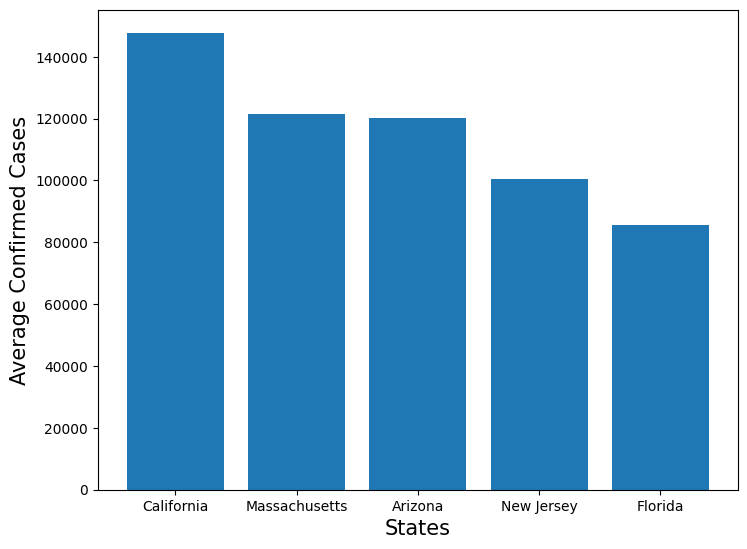

In [60]:
states  = avg_confirmed_sorted['province_state']
average = avg_confirmed_sorted['confirmed']
fig     = plt.figure()
ax      = fig.add_axes([0,0,1,1])
ax.bar(states, average)
plt.xlabel("States", size=15)
plt.ylabel("Average Confirmed Cases", size=15)
plt.show()

(b) The second graph will show deaths average based categorized by top 5 states. After the top 5 table, it will be shown the bar chart between  `the States (axis-x)` and `Average Deaths (axis-y)`.

In [61]:
avg_deaths_sorted = avg_dstates.sort_values(by='deaths', ascending=False).head(5)
avg_deaths_sorted

,province_state,deaths
2,Arizona,1762.10
20,Massachusetts,1509.10
29,New Jersey,1488.18
4,California,1446.87
6,Connecticut,1171.47


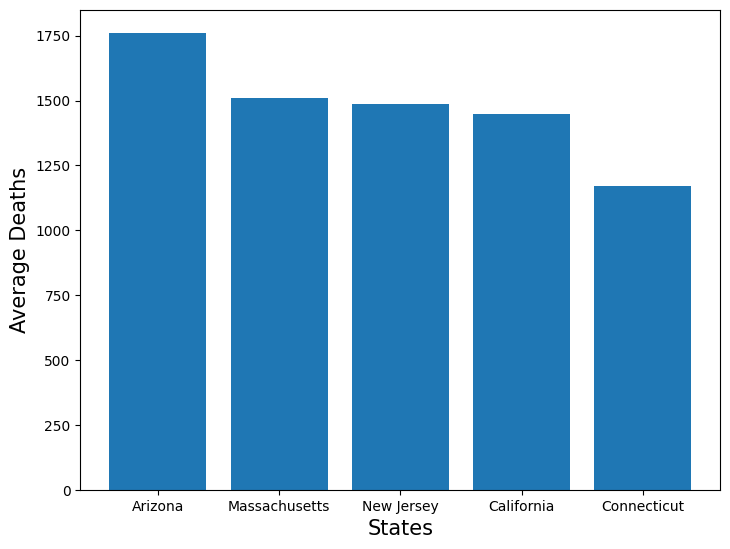

In [62]:
states  = avg_deaths_sorted['province_state']
average = avg_deaths_sorted['deaths']
fig     = plt.figure()
ax      = fig.add_axes([0,0,1,1])
ax.bar(states, average)
plt.xlabel("States", size=15)
plt.ylabel("Average Deaths", size=15)
plt.show()

(c) The third graph will show non-deaths average based categorized by top 5 states. After the top 5 table, it will be shown the bar chart between  `the States (axis-x)` and `Average Non-Deaths (axis-y)`.

In [63]:
avg_ndeaths_sorted = avg_ndstates.sort_values(by='non_deaths', ascending=False).head(5)
avg_ndeaths_sorted

,province_state,non_deaths
4,California,146384.10
20,Massachusetts,119864.54
2,Arizona,118451.86
29,New Jersey,99003.09
8,Florida,84493.28


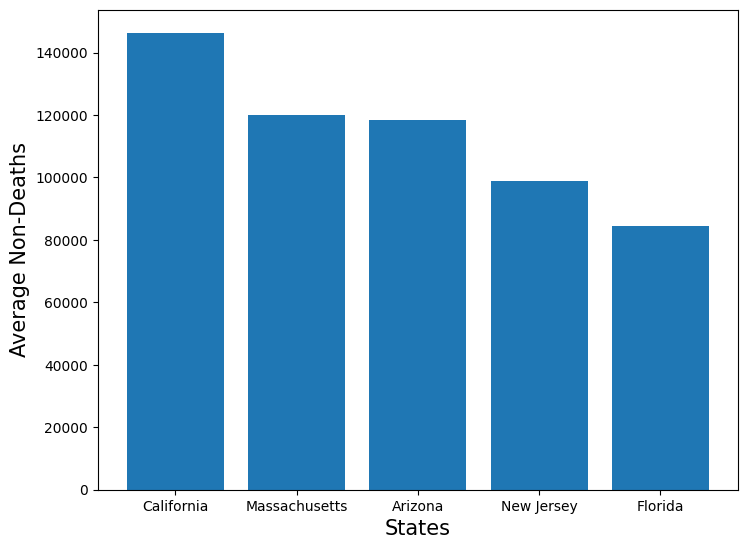

In [64]:
states  = avg_ndeaths_sorted['province_state']
average = avg_ndeaths_sorted['non_deaths']
fig     = plt.figure()
ax      = fig.add_axes([0,0,1,1])
ax.bar(states, average)
plt.xlabel("States", size=15)
plt.ylabel("Average Non-Deaths", size=15)
plt.show()

---
### **6. Conclusion**

As we can see from the objection until data exploration (or analysis), we can understand that the statement where the vaccine company should distribute their sales in some states with the most needed vaccination: `California`.

- `California` is categorized as the state with the highest confirmed cases, and still in the top 5 of highest deaths, although the number of recovered and active patients being hospitalized are the highest. This means the communnity affected by COVID-19 is still the highest, and **California should get the highest priority for vaccination distribution**.
- `Massachusetts` is ranked number 2 in all categories as the highest of confirmed cases, deaths, and non-deaths. **Massachusetts should get the highest priority for vaccination distribution**.
- `South Dakota` and `North Dakota` can be included as **the lowest priority** for the vaccine distribution.
- `Texas` has the most reported cases during first semester of 2022, with the total reports: 46118, followed by Georgia which is 29141 reported cases, and `Virginia` with 24252 reported cases. However, this should be taken notes although those three states has the highest number of reported cases, their average of confirmed cases, deaths, and non-deaths are not even in the top 10 highest.

There is a suggestion to keep updating the cases and evaluating this with the existing population. From these studies about priority of vaccination distribution, at least the vaccine company can decide and make a plan when to start distributing the vaccines for the last semester of 2022.

```
References:
kode.id, Full Time Data Science - Phase 0, week 1, all presentations.
google colab by hacktiv8, "Week 1: Day 4 PM // Pandas Basic", NBA Case.
"Isin", https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html
"Matplotlib", https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm#
```